# Data loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from PIL import Image


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from pathlib import Path
folder_path = Path("/content/drive/MyDrive/Notebooks/Normal_Vision/data")

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    subset="training",
    seed=123,
    image_size=(224,224),
    label_mode='int',
    validation_split=0.2
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    subset="validation",
    seed=123,
    image_size=(224,224),
    label_mode='int',
    validation_split=0.2
)

Found 1400 files belonging to 10 classes.
Using 1120 files for training.
Found 1400 files belonging to 10 classes.
Using 280 files for validation.


In [4]:
folder_0_images = list(folder_path.glob('0/*'))
img = Image.open(folder_0_images[1])

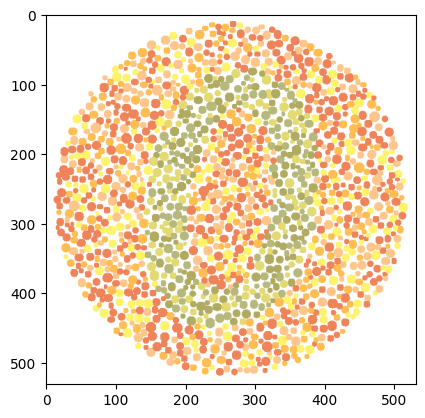

In [5]:
plt.imshow(img)
plt.show()

# Model - First Version - Good accuracy

In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply it to training set
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Apply it to validation set
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [11]:
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,964,042 (45.64 MB)

 Trainable params: 11,964,042 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=10
)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.0910 - loss: 8.9999 - val_accuracy: 0.1179 - val_loss: 2.2962
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.1695 - loss: 2.2774 - val_accuracy: 0.1357 - val_loss: 2.1800
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.3683 - loss: 1.9156 - val_accuracy: 0.4357 - val_loss: 1.5844
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.5181 - loss: 1.3588 - val_accuracy: 0.5179 - val_loss: 1.2850
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step - accuracy: 0.6140 - loss: 1.0806 - val_accuracy: 0.5321 - val_loss: 1.1705
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.6135 - loss: 1.0044 - val_accuracy: 0.5286 - val_loss: 1.1652
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.6201 - loss: 0.9712 - val_accuracy: 0.5429 - val_loss: 1.1143
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.6206 - loss: 0.9507 - val_accuracy: 0.5607 - v

In [13]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

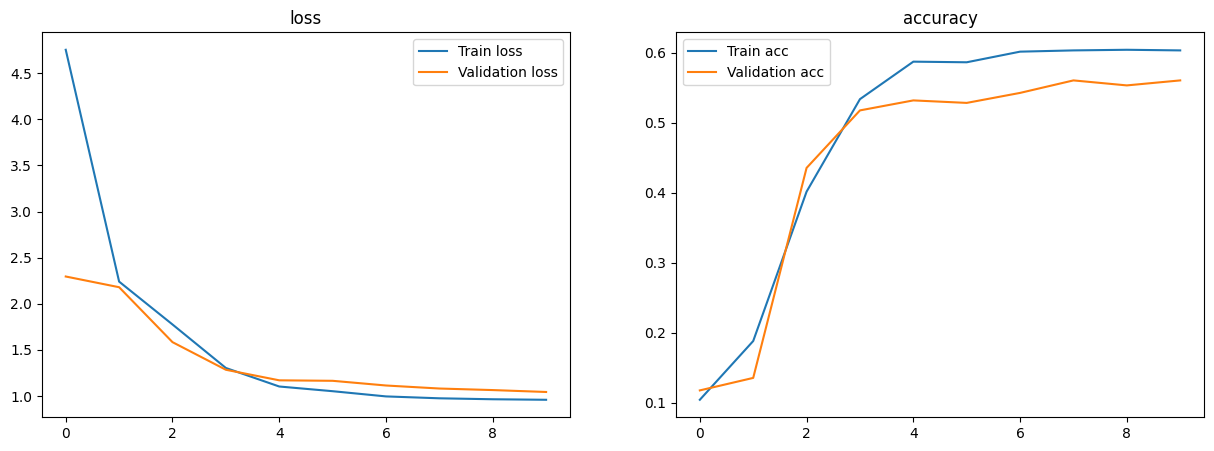

In [14]:
plot_history(history)

In [20]:
# SAVE MODEL
model.save('NVmodel_with_62acc.h5')

In [15]:
# MORE EPOCHS
# DIFFERENT ARCHITECTURE
# PRE TRAINED MODELS, TRANSFER LEARNING LECTURE


# Model - Lecture version - MNIST

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

def initialize_model():
    model = models.Sequential()
    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(224, 224, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(10, activation='softmax'))

    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [ ]:
model = initialize_model()
model.summary()

In [ ]:
es = EarlyStopping(patience = 20, restore_best_weights=True)
history = model.fit(train_ds,
          validation_data=val_ds,
          epochs= 10,
          callbacks=[es],
          batch_size = 32)

In [ ]:
plot_history(history)